In [131]:
import pandas as pd
import pymssql
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [132]:
from config import database
from config import Mouse
from config import Virus
from config import Protein
from config import Biotin
from config import Fraction
from config import Protein_Id
from config import Gene
from config import Protein_Description
from config import Peptide
from config import username
from config import password
from config import server

In [133]:
try:
    conn = pymssql.connect(server,username, password,database)

    cursor = conn.cursor()
    query_43 = f"""
    SELECT 
        G.Gene_Label,
        COUNT(G.Gene_Label) AS Protein_Repeats,
        V.Virus_Label,
        B.Biotin_Label,
        F.Fraction_Label,
        SUM(MP.Hits) AS Hits,
        SUM(MP.Hits) / COUNT(G.Gene_Label) AS Hits_per_Protein
        FROM Mouse_Protein AS MP 
    INNER JOIN {Mouse} AS M on MP.Mouse_ID = M.Mouse_ID
    INNER JOIN {Protein} AS P on MP.Protein_ID = P.Protein_ID
    INNER JOIN {Virus} AS V on M.Virus_ID = V.Virus_ID
    INNER JOIN {Biotin} AS B on M.Biotin_ID = B.Biotin_ID
    INNER JOIN {Fraction} AS F on M.Fraction_ID = F.Fraction_ID
    INNER JOIN {Protein_Id} AS PI on P.Protein_Id_ID = PI.Protein_Id_ID
    INNER JOIN {Gene} AS G on P.Gene_ID = G.Gene_ID
    INNER JOIN {Protein_Description} AS PD on P.Description_ID = PD.Description_ID
    INNER JOIN {Peptide} AS PE on P.Peptide_ID = PE.Peptide_ID
    WHERE F.Fraction_Label = 'whole brain' AND B.Biotin_Label = '72' AND V.Virus_Label = 'TDP43-TurboID'
    GROUP BY G.Gene_Label, V.Virus_Label,B.Biotin_Label,F.Fraction_Label
    HAVING COUNT(G.Gene_Label) > 0 AND SUM(MP.Hits) > 0
    ORDER BY Hits_per_Protein DESC
    """
    TDP43_TurboID_df = pd.read_sql(query_43, conn)
except Exception as e:
    print(e)
TDP43_TurboID_df.head()

,Gene_Label,Protein_Repeats,Virus_Label,Biotin_Label,Fraction_Label,Hits,Hits_per_Protein
0,Actb,2,TDP43-TurboID,72,whole brain,305088000.0,152544000.0
1,Tuba1a,2,TDP43-TurboID,72,whole brain,205709300.0,102854650.0
2,Mccc1,2,TDP43-TurboID,72,whole brain,205350600.0,102675300.0
3,Pcx,4,TDP43-TurboID,72,whole brain,399875412.0,99968853.0
4,Tuba4a,2,TDP43-TurboID,72,whole brain,167787100.0,83893550.0


In [134]:
try:
    conn = pymssql.connect(server,username, password,database)

    cursor = conn.cursor()
    query_turbo = f"""
    SELECT 
        G.Gene_Label,
        COUNT(G.Gene_Label) AS Protein_Repeats,
        V.Virus_Label,
        B.Biotin_Label,
        F.Fraction_Label,
        SUM(MP.Hits) AS Hits,
        SUM(MP.Hits) / COUNT(G.Gene_Label) AS Hits_per_Protein
        FROM Mouse_Protein AS MP 
    INNER JOIN {Mouse} AS M on MP.Mouse_ID = M.Mouse_ID
    INNER JOIN {Protein} AS P on MP.Protein_ID = P.Protein_ID
    INNER JOIN {Virus} AS V on M.Virus_ID = V.Virus_ID
    INNER JOIN {Biotin} AS B on M.Biotin_ID = B.Biotin_ID
    INNER JOIN {Fraction} AS F on M.Fraction_ID = F.Fraction_ID
    INNER JOIN {Protein_Id} AS PI on P.Protein_Id_ID = PI.Protein_Id_ID
    INNER JOIN {Gene} AS G on P.Gene_ID = G.Gene_ID
    INNER JOIN {Protein_Description} AS PD on P.Description_ID = PD.Description_ID
    INNER JOIN {Peptide} AS PE on P.Peptide_ID = PE.Peptide_ID
    WHERE F.Fraction_Label = 'whole brain' AND B.Biotin_Label = '72' AND V.Virus_Label = 'TurboID'
    GROUP BY G.Gene_Label, V.Virus_Label,B.Biotin_Label,F.Fraction_Label
    HAVING COUNT(G.Gene_Label) > 0 AND SUM(MP.Hits) > 0
    ORDER BY Hits_per_Protein DESC
    """
    TurboID_df = pd.read_sql(query_turbo, conn)
except Exception as e:
    print(e)
TurboID_df.head()

,Gene_Label,Protein_Repeats,Virus_Label,Biotin_Label,Fraction_Label,Hits,Hits_per_Protein
0,Mccc1,2,TurboID,72,whole brain,196105700.0,98052850.00
1,Pcx,4,TurboID,72,whole brain,366362079.0,91590519.75
2,Pcca,4,TurboID,72,whole brain,252285948.0,63071487.00
3,Krt17,2,TurboID,72,whole brain,116016500.0,58008250.00
4,Tmprss13,2,TurboID,72,whole brain,94606200.0,47303100.00


In [135]:
TurboID_df_mini = TurboID_df[["Gene_Label", "Hits_per_Protein"]].rename(columns = {"Hits_per_Protein":"Hits_per_Protein_TurboID" })
TDP43_TurboID_df_mini = TDP43_TurboID_df[["Gene_Label", "Hits_per_Protein"]].rename(columns = {"Hits_per_Protein":"Hits_per_Protein_TDP43_TurboID" })

In [136]:
print("TurboID:",len(TurboID_df_mini.Gene_Label.unique()))
print("TDP43-TurboID:",len(TDP43_TurboID_df.Gene_Label.unique()))
print("Total:", (len(TurboID_df_mini.Gene_Label.unique()) + len(TDP43_TurboID_df.Gene_Label.unique())))

TurboID: 1725
TDP43-TurboID: 3494
Total: 5219


In [139]:
TurboID_df_mini["Virus_Label"] = TurboID_df_mini.apply(lambda x : "TurboID", axis = 1)
TDP43_TurboID_df_mini["Virus_Label"] = TDP43_TurboID_df_mini.apply(lambda x : "TDP43_TurboID", axis = 1)
union_df = pd.concat([TurboID_df_mini, TDP43_TurboID_df_mini], ignore_index = True)
union_df["Hits_per_Protein"] = union_df.apply(lambda x : x["Hits_per_Protein_TurboID"] if x["Virus_Label"] == "TurboID" else x["Hits_per_Protein_TDP43_TurboID"], axis = 1)
union_df = union_df[["Gene_Label", "Virus_Label", "Hits_per_Protein"]]
union_df

,Gene_Label,Virus_Label,Hits_per_Protein
0,Mccc1,TurboID,98052850.00
1,Pcx,TurboID,91590519.75
2,Pcca,TurboID,63071487.00
3,Krt17,TurboID,58008250.00
4,Tmprss13,TurboID,47303100.00
...,...,...,...
5214,Tns1,TDP43_TurboID,11184.85
5215,Tmem63b,TDP43_TurboID,10732.10
5216,Ptpa,TDP43_TurboID,9529.55
5217,Il1rap,TDP43_TurboID,9226.10


# Box and Whisker Graph, Normal and Log() versions

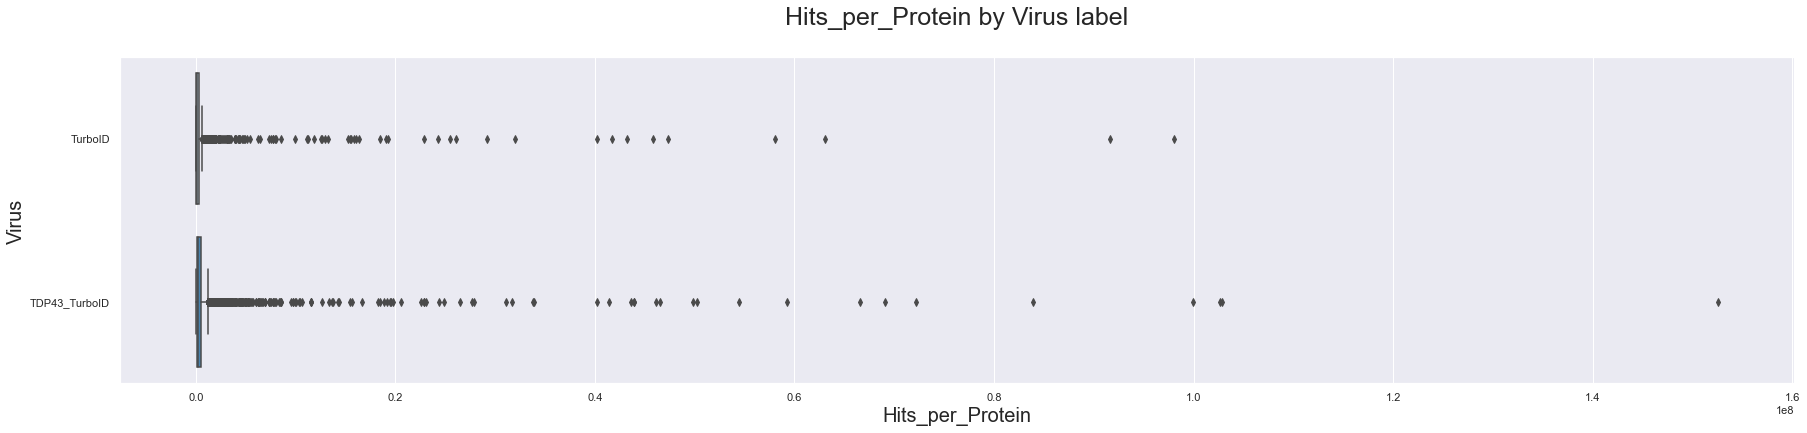

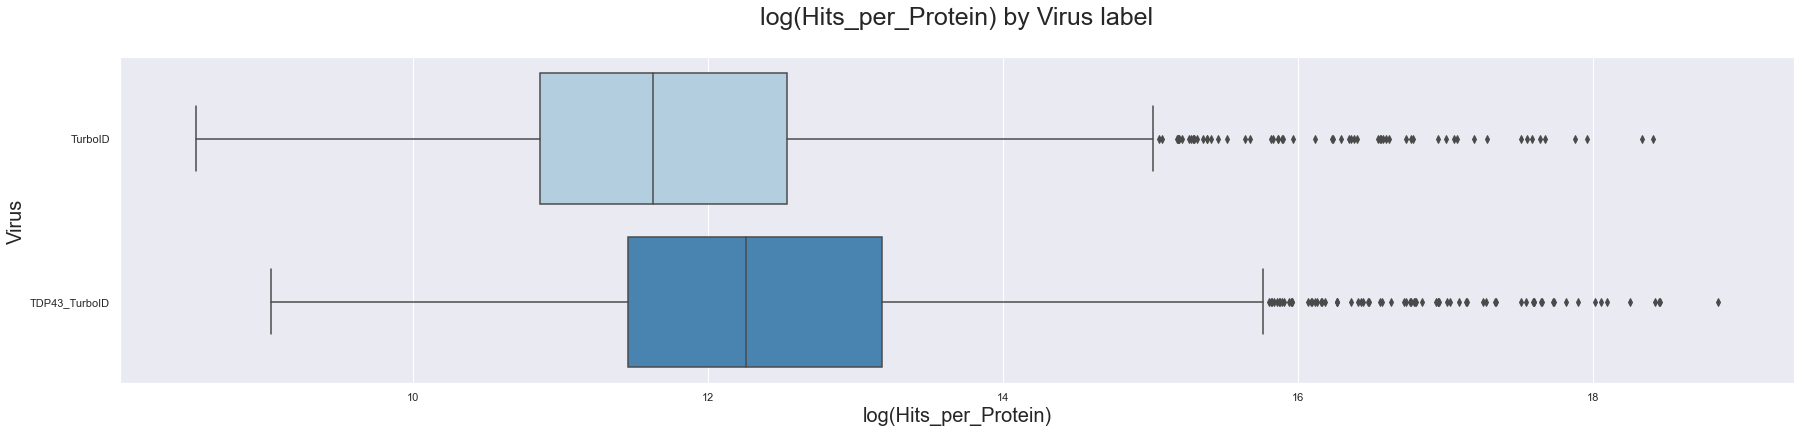

In [140]:
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(6)

sns.boxplot( x=union_df["Hits_per_Protein"], y=union_df["Virus_Label"], palette="Blues")
plt.title("Hits_per_Protein by Virus label\n", size = 25)
plt.xlabel(xlabel = "Hits_per_Protein", size = 20)
plt.ylabel(ylabel = "Virus", size = 20)
plt.show()

f = plt.figure()
f.set_figwidth(30)
f.set_figheight(6)

sns.boxplot( x=np.log(union_df["Hits_per_Protein"]), y=union_df["Virus_Label"], palette="Blues")
plt.title("log(Hits_per_Protein) by Virus label\n", size = 25)
plt.xlabel(xlabel = "log(Hits_per_Protein)", size = 20)
plt.ylabel(ylabel = "Virus", size = 20)
plt.show()

# Heat Map

C:\Users\Adam Brewer\AppData\Local\Temp\ipykernel_7696\308349286.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if(len(union_df[union_df["Virus_Label"] == "TurboID"][union_df["Gene_Label"] == f"{col}"]) == 0):
C:\Users\Adam Brewer\AppData\Local\Temp\ipykernel_7696\308349286.py:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  union_df_heatmap_piv[f"{col}"][virus] = union_df[union_df["Virus_Label"] == "TurboID"][union_df["Gene_Label"] == f"{col}"]["Hits_per_Protein"].tolist()[0]
C:\Users\Adam Brewer\AppData\Local\Temp\ipykernel_7696\308349286.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  union_df_heatmap_piv[f"{col}"][virus] = union_df[union_df["Virus_Label"] == "TurboID"][union_df["Gene_Label"] == f"{col}"]["Hits_per_Protein"]

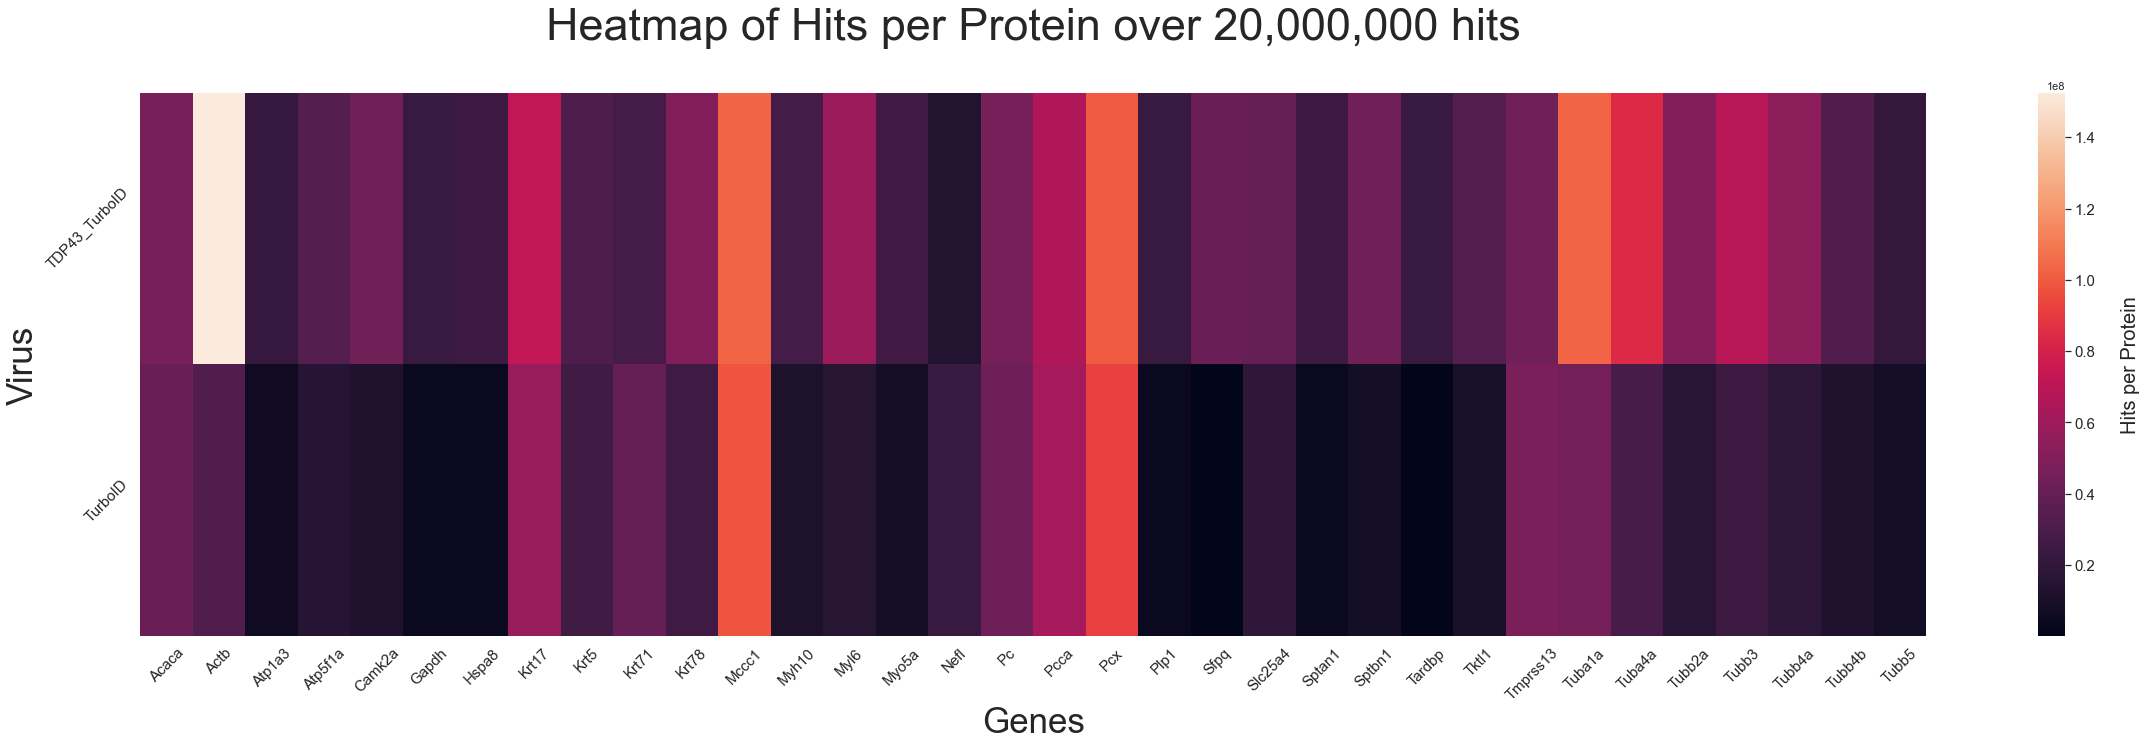

In [141]:
# limit for the number of hits
# edit to see different heat maps
# 8 million is a good minimum for the limit, and 50 million is a good maximum for the limit (if wanting to check out different visualizations)
limit = 20_000_000

union_df_heatmap = union_df.copy()
union_df_heatmap = union_df_heatmap[union_df_heatmap["Hits_per_Protein"] > limit]
union_df_heatmap_piv = union_df_heatmap.pivot("Virus_Label", "Gene_Label", "Hits_per_Protein")
union_df_heatmap_piv = union_df_heatmap_piv.fillna("")

# fancy little bit to call in all hits values lost during filter of limit
columns_heat = union_df_heatmap_piv.columns
for col in columns_heat:
    for virus in range(2):
        if(union_df_heatmap_piv[f"{col}"][virus] == ""):
            if(virus == 0):
                if(len(union_df[union_df["Virus_Label"] == "TDP43_TurboID"][union_df["Gene_Label"] == f"{col}"]) == 0):
                    union_df_heatmap_piv[f"{col}"][virus] = np.NaN
                else:
                    union_df_heatmap_piv[f"{col}"][virus] = union_df[union_df["Virus_Label"] == "TDP43_TurboID"][union_df["Gene_Label"] == f"{col}"]["Hits_per_Protein"].tolist()[0]
            else:
                if(len(union_df[union_df["Virus_Label"] == "TurboID"][union_df["Gene_Label"] == f"{col}"]) == 0):
                    union_df_heatmap_piv[f"{col}"][virus] = np.NaN
                else:
                    union_df_heatmap_piv[f"{col}"][virus] = union_df[union_df["Virus_Label"] == "TurboID"][union_df["Gene_Label"] == f"{col}"]["Hits_per_Protein"].tolist()[0]

union_df_heatmap_piv = union_df_heatmap_piv.fillna(0)

sns.set()
f = plt.figure()
f.set_figwidth(40)
f.set_figheight(10)
ax = sns.heatmap(union_df_heatmap_piv, cbar_kws={'label': '\nHits per Protein'})
plt.title(f"Heatmap of Hits per Protein over {limit:,d} hits\n", size = 45)
ax.figure.axes[-1].yaxis.label.set_size(20)
ax.figure.axes[-1].tick_params(labelsize=15)
plt.xticks(rotation = 45, size = 15)
plt.yticks(rotation = 45, size = 15)
plt.xlabel(xlabel = "Genes", size = 35)
plt.ylabel(ylabel = "Virus", size = 35)
plt.show()